In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [5]:
# https://www.kaggle.com/tunguz/deep-solar-dataset
df = pd.read_csv('deepsolar_tract.csv', encoding='latin-1')

In [58]:
for col in df.columns:
    print(col)

Unnamed: 0
tile_count
solar_system_count
total_panel_area
fips
average_household_income
county
education_bachelor
education_college
education_doctoral
education_high_school_graduate
education_less_than_high_school
education_master
education_population
education_professional_school
employed
gini_index
heating_fuel_coal_coke
heating_fuel_electricity
heating_fuel_fuel_oil_kerosene
heating_fuel_gas
heating_fuel_housing_unit_count
heating_fuel_none
heating_fuel_other
heating_fuel_solar
land_area
per_capita_income
population
population_density
poverty_family_below_poverty_level
poverty_family_count
race_asian
race_black_africa
race_indian_alaska
race_islander
race_other
race_two_more
race_white
state
total_area
unemployed
water_area
education_less_than_high_school_rate
education_high_school_graduate_rate
education_college_rate
education_bachelor_rate
education_master_rate
education_professional_school_rate
education_doctoral_rate
race_white_rate
race_black_africa_rate
race_indian_alaska_rate

In [37]:
for col in df.columns:
    try:
        pd.to_numeric(df[col])
    except:
        print(col)

county
state
electricity_price_transportation


In [44]:
df = df.dropna()

In [74]:
target = 'total_panel_area'
omit = ['Unnamed: 0', 'fips', 'county', 'state', 'electricity_price_transportation', 'total_panel_area_residential',
'total_panel_area_nonresidential', 'solar_system_count']

X = df.loc[:, ~(df.columns).isin([target]+ omit)]
Y = df[target]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

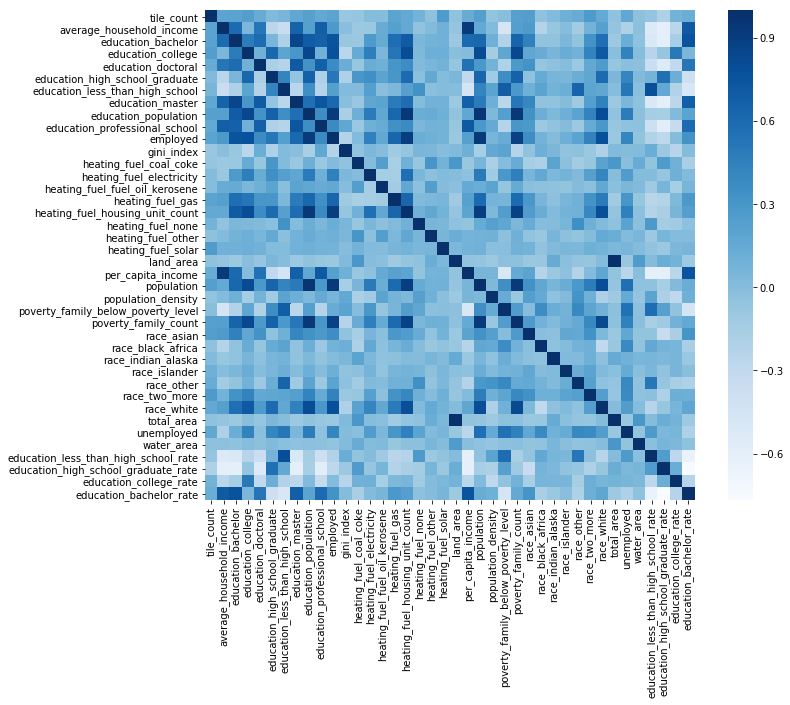

In [76]:
corrmat = X_train[X_train.columns[0:40]].corr()#alt_X_df.corr()

fig, ax = plt.subplots(1,1, figsize = (12,9))
sns.heatmap(corrmat, vmax = 1, square = True, annot=False,cmap='Blues')

In [77]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
pred = lin_reg.predict(X_test)

In [79]:
lin_reg.score(X_test, y_test)

0.88395716400677982

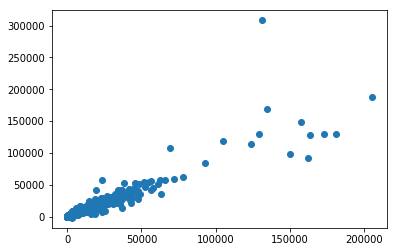

In [86]:
plt.scatter(y_test,pred)

In [81]:
X.columns[lin_reg.coef_.argsort()]

Index(['electricity_consume_total', 'education_professional_school',
       'education_college', 'education_less_than_high_school',
       'education_bachelor', 'education_doctoral', 'education_master',
       'education_high_school_graduate', 'race_islander', 'race_two_more',
       ...
       'heating_fuel_coal_coke', 'heating_fuel_gas',
       'heating_fuel_electricity', 'heating_fuel_none', 'heating_fuel_other',
       'population', 'education_population', 'electricity_consume_residential',
       'electricity_consume_industrial', 'electricity_consume_commercial'],
      dtype='object', length=160)

In [88]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(scaler.transform(X_train), y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
preds = svr.predict(scaler.transform(X_test))
svr.score(scaler.transform(X_test), y_test)